## CarPricesPrediction


In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt


In [7]:
excel_prices = pd.read_csv('CarPricesPrediction.csv')
print(excel_prices)

     Unnamed: 0       Make      Model  Year  Mileage  Condition     Price
0             0       Ford  Silverado  2022    18107  Excellent  19094.75
1             1     Toyota  Silverado  2014    13578  Excellent  27321.10
2             2  Chevrolet      Civic  2016    46054       Good  23697.30
3             3       Ford      Civic  2022    34981  Excellent  18251.05
4             4  Chevrolet      Civic  2019    63565  Excellent  19821.85
..          ...        ...        ...   ...      ...        ...       ...
995         995     Nissan      Camry  2010   149032  Excellent  24548.50
996         996  Chevrolet      F-150  2014    20608  Excellent  26969.70
997         997       Ford     Altima  2016   109851       Good  20507.55
998         998     Toyota  Silverado  2010    11704       Good  31414.90
999         999     Nissan  Silverado  2017   128390  Excellent  18580.60

[1000 rows x 7 columns]


In [9]:
excel_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [10]:
excel_prices.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price'], dtype='object')

In [18]:
excel_prices["Condition"]

0      Excellent
1      Excellent
2           Good
3      Excellent
4      Excellent
         ...    
995    Excellent
996    Excellent
997         Good
998         Good
999    Excellent
Name: Condition, Length: 1000, dtype: object

c:\Users\laptop\anaconda3\envs\carprices\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


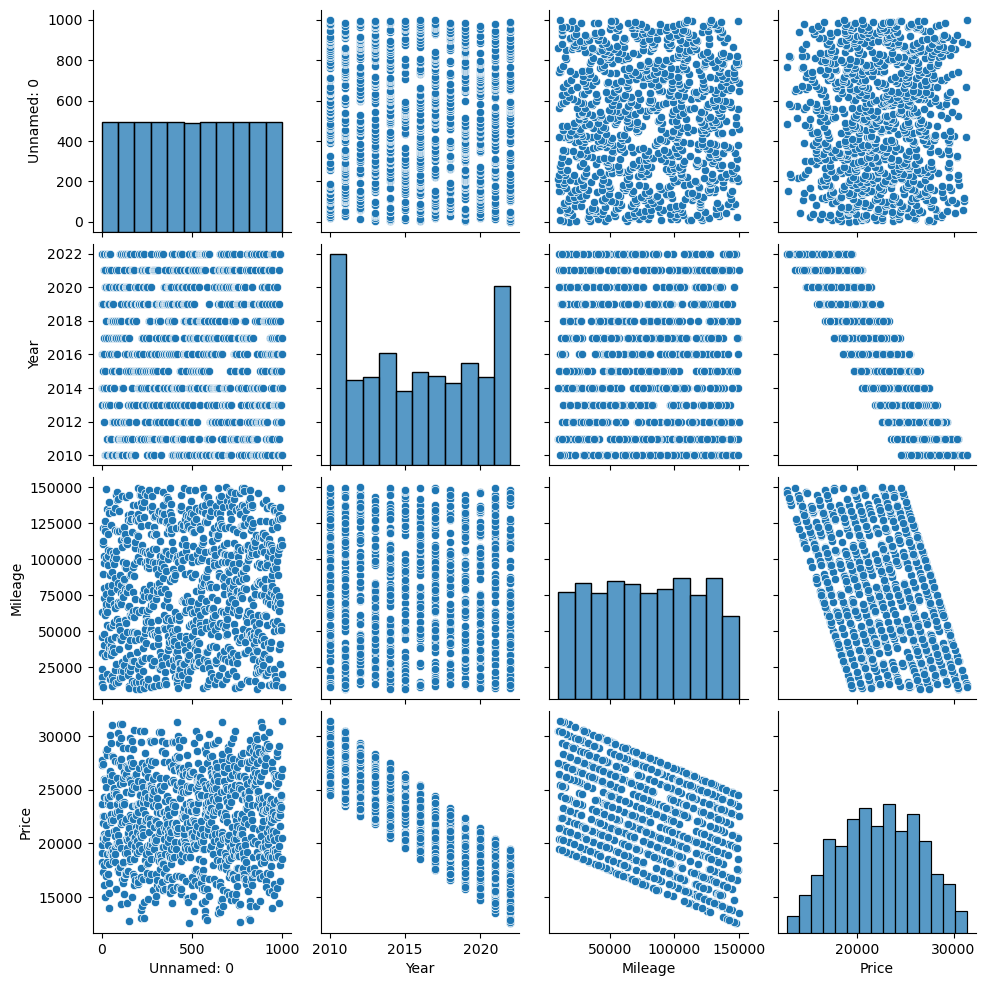

In [16]:
# analyse de donnees a l aide de la bibliotheque seaborn, comparaison de chaque donnee avec une autre
sb.pairplot(excel_prices)

## Preparation de Data

In [17]:
excel_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [22]:
x = excel_prices[[ 'Make','Model','Year','Mileage','Condition']]
y = excel_prices['Price']
print(x)


          Make      Model  Year  Mileage  Condition
0         Ford  Silverado  2022    18107  Excellent
1       Toyota  Silverado  2014    13578  Excellent
2    Chevrolet      Civic  2016    46054       Good
3         Ford      Civic  2022    34981  Excellent
4    Chevrolet      Civic  2019    63565  Excellent
..         ...        ...   ...      ...        ...
995     Nissan      Camry  2010   149032  Excellent
996  Chevrolet      F-150  2014    20608  Excellent
997       Ford     Altima  2016   109851       Good
998     Toyota  Silverado  2010    11704       Good
999     Nissan  Silverado  2017   128390  Excellent

[1000 rows x 5 columns]


## Division des donnees en partie test et partie entrainement

In [24]:
# soit utiliser sklearn , testtrainsplit ou les diviser manuellement
x_train , y_train = x[:int(0.7*len(x))],y[:int(0.7*len(y))]
x_test , y_test = x[int(0.7*len(x)):],y[int(0.7*len(y)):]

In [25]:
print(x_train)

          Make      Model  Year  Mileage  Condition
0         Ford  Silverado  2022    18107  Excellent
1       Toyota  Silverado  2014    13578  Excellent
2    Chevrolet      Civic  2016    46054       Good
3         Ford      Civic  2022    34981  Excellent
4    Chevrolet      Civic  2019    63565  Excellent
..         ...        ...   ...      ...        ...
695       Ford      F-150  2013   102622  Excellent
696       Ford      Civic  2014    58577  Excellent
697       Ford      Camry  2017    97843       Good
698       Ford      Camry  2022    29471  Excellent
699  Chevrolet      Camry  2013    39120       Fair

[700 rows x 5 columns]


## entrainement sous la regression lineaire


In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [40]:
x_train.info()
categorical_columns=['Make','Model','Condition']
categorical_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Make       700 non-null    object
 1   Model      700 non-null    object
 2   Year       700 non-null    int64 
 3   Mileage    700 non-null    int64 
 4   Condition  700 non-null    object
dtypes: int64(2), object(3)
memory usage: 27.5+ KB


['Make', 'Model', 'Condition']

In [42]:
x_train_encoded = pd.get_dummies(x_train, columns=categorical_columns)
x_train_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 700 non-null    int64
 1   Mileage              700 non-null    int64
 2   Make_Chevrolet       700 non-null    bool 
 3   Make_Ford            700 non-null    bool 
 4   Make_Honda           700 non-null    bool 
 5   Make_Nissan          700 non-null    bool 
 6   Make_Toyota          700 non-null    bool 
 7   Model_Altima         700 non-null    bool 
 8   Model_Camry          700 non-null    bool 
 9   Model_Civic          700 non-null    bool 
 10  Model_F-150          700 non-null    bool 
 11  Model_Silverado      700 non-null    bool 
 12  Condition_Excellent  700 non-null    bool 
 13  Condition_Fair       700 non-null    bool 
 14  Condition_Good       700 non-null    bool 
dtypes: bool(13), int64(2)
memory usage: 19.9 KB


In [43]:
model.fit(x_train_encoded,y_train)

LinearRegression()

In [46]:
x_test_encoded = pd.get_dummies(x_test,columns=categorical_columns)
y_predict = model.predict(x_test_encoded)
y_predict

array([28982.79955866, 28740.99433726, 20425.14941912, 20765.99986542,
       16898.14316489, 15163.60494378, 18472.69971275, 23442.64721522,
       27765.19789548, 19646.20370325, 17216.35376623, 28016.1936715 ,
       26119.70102182, 24388.09707573, 25008.7504971 , 29345.0029439 ,
       23855.00502771, 25234.15242631, 18608.2430297 , 14677.19820296,
       15287.26718091, 17161.20531268, 21545.05639815, 17005.99313536,
       26396.54690483, 27838.89673043, 24969.29617595, 19938.26492831,
       17160.50388754, 19253.45524712, 29861.6482947 , 20428.39254511,
       16771.20777844, 16657.20468584, 18911.34645835, 27248.10045264,
       19385.40751846, 24488.72312654, 14698.44622471, 25414.44843041,
       30455.40582167, 22532.19673609, 15288.00753186, 26674.90669567,
       20428.91223468, 22144.10487542, 21042.81053957, 22713.09985772,
       21593.40466764, 17715.55201286, 16048.14938521, 18789.00175358,
       27112.04830178, 26310.80003476, 18944.8626358 , 17698.20960605,
      

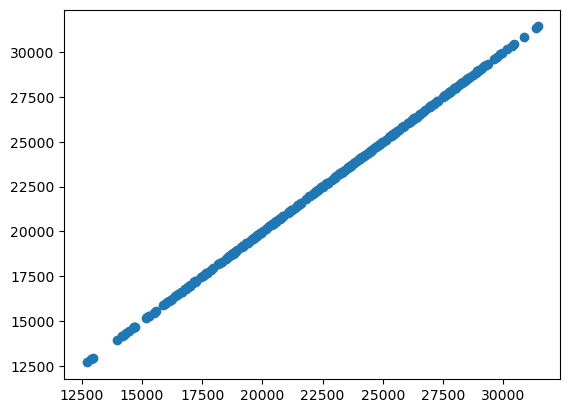

In [47]:
plt.scatter(y_test,y_predict)

## Evaluation

In [48]:
from sklearn import metrics
metrics.r2_score(y_test,y_predict)

0.9999999997471879